<a href="https://colab.research.google.com/github/janchorowski/ml_uwr/blob/fall2020/assignment1/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Assignment 1


## Important notes

**Submission deadline:**
* **Regular problems: last lab session before Friday 16.10.2020**
* **Bonus problems: deadline for Lab Assignment 2**

**Points: 11 + 3 bonus points**

Please note: some of the assignments are tedious or boring if you are already a NumPy ninja. The bonus problems were designed to give you a more satisfying alternative.

The assignment is in the form of a Jupyter notebook. We will be using [Google Colab](https://colab.research.google.com) to solve it. Below you will find a "Setup" section. Follow instructions from this paragraph to download the notebook and open it using [Google Colab](https://colab.research.google.com). 

Your goal is to solve problems posted below. Whenever possible, add your solutions to the notebook.

Please email us about any problems with it - we will try to correct them quickly. Also, please do not hesitate to use GitHub’s pull requests to send us corrections!

## Setup

### 1. Open the notebook using Google Colab

1. From Github: Click on "View in Colaboratory", then save to your Google Drive.
2. Alternatively upload manually to Drive:
  1. Download the notebook or clone https://github.com/janchorowski/ml_uwr.
  2. Go to  [Google Colab](https://colab.research.google.com).
  3. Go to "UPLOAD" tab and select a local copy of the notebook that you downloaded in point 1.
  
Colab Tips:
1. Set tab width to 4 spaces under `Tools` → `Settings` → `Editor`.
  
### 2. Open the notebook offline using Jupyter/IPython

This notebook can be opened using Jupyter notebook. Simply install a scientific Python distribution on your computer (e.g. [Anaconda](https://www.anaconda.com/) or [WinPython](http://winpython.github.io/)), clone the repository https://github.com/janchorowski/ml_uwr and run `jupyter notebook`.

###   3. Install required dependencies, download data and import packages

Run cells below. To run a cell either click it and click a run button or press "shift + enter"


In [ ]:
# Please note that this code needs only to be run in a fresh runtime.
# However, it can be rerun afterwards too.
# Here we download and install locally two libraries:
# -  gdown is a library similar to curl and wget but it allows to download big files from google drive
#    two previous apps have problem with this because of google warning that file is too big to scan it with antivirus.
# -  httpimport allows to import modules from web using HTTP/HTTPS.
!pip install -q gdown httpimport
# If you don't use virtual env and you work on own computer, then you may want to install these packages
# system wide, in such case you should use: 'sudo pip install gdown httpimport' in your shell.
# Download MNIST data set, which we will be use in problem 5..
# If you have installed gdown locally, then you probably want to change here 'gdown' to '~/.local/bin/gdown',
# because ~/.local/bin is default directory for packages installed locally by pip.
![ -e mnist.npz ] || gdown 'https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU' -O mnist.npz

Downloading...
From: https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU
To: /content/mnist.npz
55.4MB [00:00, 108MB/s] 


In [ ]:
# Standard IPython notebook imports
%matplotlib inline

import os

import httpimport
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import scipy.stats as sstats

import seaborn as sns
from sklearn import datasets

# In this way we can import functions straight from github
with httpimport.github_repo('janchorowski', 'nn_assignments', 
                            module='common', branch='nn18'):
     from common.plotting import plot_mat

sns.set_style('whitegrid')

### 4. Follow the notebook and solve problems posted below

## Problems

### Problem 0 [0p]

 
1. To learn more about Jupyter,  read [Jupyter tutorial from Data Analysis in Biological Sciences course at Caltech](http://bebi103.caltech.edu/2015/tutorials/t0b_intro_to_jupyter_notebooks.html) (which itself can be downloaded as a Jupyter notebook). Feel free to skip the tutorial if you have some prior experience with Jupyter notebook.
2. To learn more about basic Google Colab features, go to [Google Colab](https://colab.research.google.com) and select "Overview of Colaboratory Features" in "EXAMPLES" tab. To learn more about / set up useful keyboard shortcuts (e.g. to add a new cell without clicking ""+ code"), go to "Tools --> Keyboard shortcuts"

### Problem 1: NumPy [2p]

First, get familiar with Python at https://docs.python.org/3/tutorial/. Then, get
to know the capabilities of NumPy, the prime numerical library of Python http://www.numpy.org/, for instance with the tutorial at https://numpy.org/doc/stable/user/quickstart.html. Finally, look into Pandas at https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html.

You might also need:
  1. another intro to NumPy,
http://people.duke.edu/~ccc14/pcfb/numerics.html
  2. a better interactive shell for Python
http://ipython.org/
  3. a plotting library for Python
http://matplotlib.org/
  4. nice statistical plots for matplotlib https://seaborn.pydata.org/.


**a) Declare variables:**
1. $a=10$,
2. $b=2.5\times 10^{23}$,
3. $c=2+3i$, where $i$ is an imaginary unit,
4. $d=e^{i2\pi/3}$, where $i$ is an imaginary unit, $e$ is the Euler's number (use `exp`, `pi`).

In [ ]:
# TODO: Complete the declarations
a = 10
b = 2.5 * np.power(10,23)
c = 2 + 3j
d = np.exp(2j * np.pi / 3)
d

(-0.4999999999999998+0.8660254037844387j)

**b) Declare vectors:**
1. $aVec=\begin{bmatrix} 3.14 & 15 & 9 & 26 \end{bmatrix}$,
2. $bVec=\begin{bmatrix} 5 & 4.8 & \cdots & -4.8 & -5 \end{bmatrix}$ (vector of numbers from $5$ to $-5$ decreasing by $0.2$),
3. $cVec=\begin{bmatrix} 10^0 & 10^{0.01} & \cdots & 10^{0.99} & 10^1 \end{bmatrix}$ (logarithmically spaced numbers from 1 to 10, use `logspace` and make sure, that the result has correct length!),
4. $dVec=Hello$ ($dVec$ is a string of characters, thus a vector).

In [ ]:
aVec = np.array([3.14, 15, 9, 26])
bVec = np.linspace(5,-5,51)
cVec = np.logspace(0.1,1,101)
dVec = 'Hello'
dVec

'Hello'

**c) Declare matrices:**
1. \begin{equation}aMat=\begin{bmatrix}
                    2      & \cdots & 2 \\
                    \vdots & \ddots & \vdots \\
                    2      & \cdots & 2
          \end{bmatrix},\end{equation}
    matrix $9\times 9$ filled with 2s (use `ones` or `zeros`),
2. \begin{equation}bMat=\begin{bmatrix}
                    1      & 0      & \cdots &        & 0      \\
                    0      & \ddots & 0      &        & 0      \\
                    \vdots & 0      & 5      & 0      & \vdots \\
                           &        & 0      & \ddots & 0      \\
                    0      &        & \cdots & 0      & 1
                \end{bmatrix},\end{equation}
    matrix $9\times 9$ filled with zeros, with
    $[ 1, 2, 3, 4, 5, 4, 3, 2, 1]$ on its diagonal (use `zeros`, `diag`),
3. \begin{equation}cMat=\begin{bmatrix}
                    1      & 11     & \cdots & 91     \\
                    2      & 12     & \cdots & 92     \\
                    \vdots & \vdots & \ddots & \vdots \\
                    10     & 20     & \cdots & 100
                \end{bmatrix},\end{equation}
    matrix $10\times 10$, columns of which form the vector $1:100$ (use `reshape`),
4. \begin{equation}dMat=\begin{bmatrix}
                    NaN & NaN & NaN & NaN \\
                    NaN & NaN & NaN & NaN \\
                    NaN & NaN & NaN & NaN
                \end{bmatrix},\end{equation}
    matrix $3\times 4$ filled with `NaN`s (use... `NaN`),
5. \begin{equation}eMat=\begin{bmatrix}
                    13  & -1  & 5  \\
                    -22 & 10  & -87
                \end{bmatrix},\end{equation}
6. $fMat$ of shape $3\times 3$ filled with random integers from $[-3,3]$ (use `rand` and `floor` or `ceil`).

In [ ]:
aMat = np.ones((9,9)) * 2
aMat
bMat = np.zeros((9,9)) + np.diag([1,2,3,4,5,4,3,2,1])
bMat
cMat = np.arange(1,101).reshape(10,10).T
cMat
dMat = np.zeros([3,4])
dMat[:] = np.NaN
eMat = np.array([[13, -1, 5], [-22, 10, -87]])
fMat = np.array([np.random.randint(-3,3) for _ in range(9)]).reshape(3,3)


**d) Declare a multiplication table**
as a $10\times 10$ matrix `mulMat`. Use matrix/vector multiplication.

In [ ]:
testMat = np.expand_dims(np.arange(1,11),axis=0)
mulMat = testMat.T.dot(testMat)
#mulMat = 
mulMat, testMat.T

(array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
        [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
        [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
        [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
        [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
        [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
        [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
        [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
        [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
        [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]]), array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]))

**e) Compute element-wise using values from b).**

For instance, the first element of $xVec[0]$ should be equal to

\begin{equation}
1/(\sqrt{2\pi2.5^2}) e^{-cVec[0]^2 / (2\cdot\pi 2.5^2)}.
\end{equation}

1. $xVec=1/(\sqrt{2\pi2.5^2}) e^{-cVec^2 / (2\cdot\pi 2.5^2)}$
2. $yVec=\log_{10}(1/cVec)$, using `log10`

In [ ]:
xVec = 1/np.sqrt(2*np.pi*pow(2.5,2))* np.exp(-pow(cVec,2)/2*np.pi*pow(2.5,2))
import math
vVec = np.vectorize(math.log10)
yVec = vVec(1/cVec)
yVec

array([-0.1  , -0.109, -0.118, -0.127, -0.136, -0.145, -0.154, -0.163,
       -0.172, -0.181, -0.19 , -0.199, -0.208, -0.217, -0.226, -0.235,
       -0.244, -0.253, -0.262, -0.271, -0.28 , -0.289, -0.298, -0.307,
       -0.316, -0.325, -0.334, -0.343, -0.352, -0.361, -0.37 , -0.379,
       -0.388, -0.397, -0.406, -0.415, -0.424, -0.433, -0.442, -0.451,
       -0.46 , -0.469, -0.478, -0.487, -0.496, -0.505, -0.514, -0.523,
       -0.532, -0.541, -0.55 , -0.559, -0.568, -0.577, -0.586, -0.595,
       -0.604, -0.613, -0.622, -0.631, -0.64 , -0.649, -0.658, -0.667,
       -0.676, -0.685, -0.694, -0.703, -0.712, -0.721, -0.73 , -0.739,
       -0.748, -0.757, -0.766, -0.775, -0.784, -0.793, -0.802, -0.811,
       -0.82 , -0.829, -0.838, -0.847, -0.856, -0.865, -0.874, -0.883,
       -0.892, -0.901, -0.91 , -0.919, -0.928, -0.937, -0.946, -0.955,
       -0.964, -0.973, -0.982, -0.991, -1.   ])


**f) Compute with matrix/vector operations.**

**NOTE:** Every multiplication (and power) in this subtask is a [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication).
1. $xMat=[0,  1, ..., 6][0, 10, 20, ..., 60]^T$,
2. $yMat=[0, 10, 20, ..., 60]^T[0,  1, ..., 6]$
<br/>
(remember, that matrix multiplication is not commutative).

In [ ]:
xMat = np.matmul(np.linspace(0,6,7), np.expand_dims(np.linspace(0,60,7),axis=0).T)
xMat
yMat = np.array(np.expand_dims(np.linspace(0,60,7),axis=0).T).dot(np.expand_dims(np.linspace(0,6,7),axis=0))
xMat, yMat 

(array([910.]), array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  10.,  20.,  30.,  40.,  50.,  60.],
        [  0.,  20.,  40.,  60.,  80., 100., 120.],
        [  0.,  30.,  60.,  90., 120., 150., 180.],
        [  0.,  40.,  80., 120., 160., 200., 240.],
        [  0.,  50., 100., 150., 200., 250., 300.],
        [  0.,  60., 120., 180., 240., 300., 360.]]))

**g) Declare `ismagic(A)` function** 
which checks if matrix $A$ is a [magic square](https://en.wikipedia.org/wiki/Magic_square) and returns a boolean.

In [ ]:
def ismagic(A):
    sum_r = np.sum(A,axis=1)
    sum_col = np.sum(A, axis=0)
    sum_dia_fst = np.sum(np.diag(A))
    sum_dia_snd = np.sum(np.diag(A[::-1])[::-1])
    if all([x==sum_r[0] for x in sum_r]):
        if all([x == sum_r[0] for x in sum_col]):
            if sum_dia_fst == sum_r[0]:
                if sum_dia_snd == sum_r[0]:
                     return True
    return False            
    

assert not ismagic(np.array([[1,1], [2,2]]))
assert ismagic(np.array([[2,7,6],[9,5,1],[4,3,8]]))

### Problem 2: Pandas and Seaborn [2p]

1. Load the IRIS Data into a `DataFrame`

In [ ]:
iris_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# Use read_csv to load the data. Make sure you get 150 examples!
iris_df = pd.read_csv(iris_url,header=None)

assert iris_df.size/5==150

# Set the column names to
# 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

# Print the first 10 entries
iris_df.take(np.arange(0,10))

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
# Show numerical summary of the data, using DataFrame.describe()
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


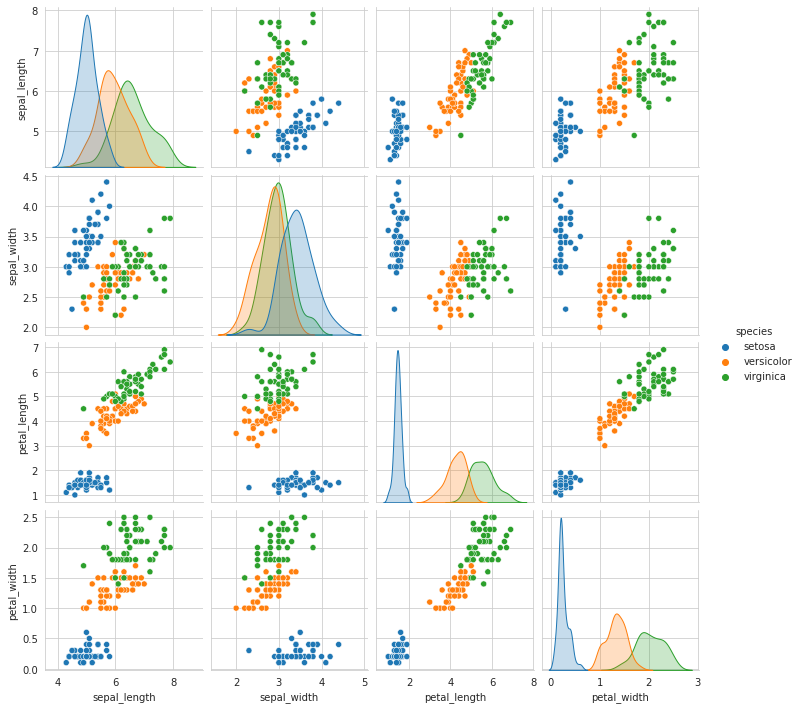

In [ ]:
# Plot the data using seaborn's pairplot
iris_sns = sns.load_dataset('iris')
sns.pairplot(iris_sns, hue='species')

The Iris data is in a so-called 'wide' format, in which each column corresponds to a variable and each row of the DataFrame corresponds to one observation. Turn it into a 'long' format in which each row is a measurement. 

Specifically, change the data layout of the IRIS dataFrame so that it has 3 columns:
- variable (one of sepal_length, sepal_width, petal_length, petal_width)
- value
- target

If you would like to learn more, [Tidy Data](https://www.jstatsoft.org/index.php/jss/article/view/v059i10/v59i10.pdf) by [Hadley Wickham](http://hadley.nz/) provides a very nice explanation of best practices for data formating.

Hint: look at reshaping functions in [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

In [ ]:

iris_df_long = pd.melt(iris_df,id_vars=['target'], var_name = 'variable', value_name = 'value')
iris_df_long.head()


,target,variable,value
0,Iris-setosa,sepal_length,5.1
1,Iris-setosa,sepal_length,4.9
2,Iris-setosa,sepal_length,4.7
3,Iris-setosa,sepal_length,4.6
4,Iris-setosa,sepal_length,5.0


Now create a box-plot of values that each variable takes, split by the target species.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


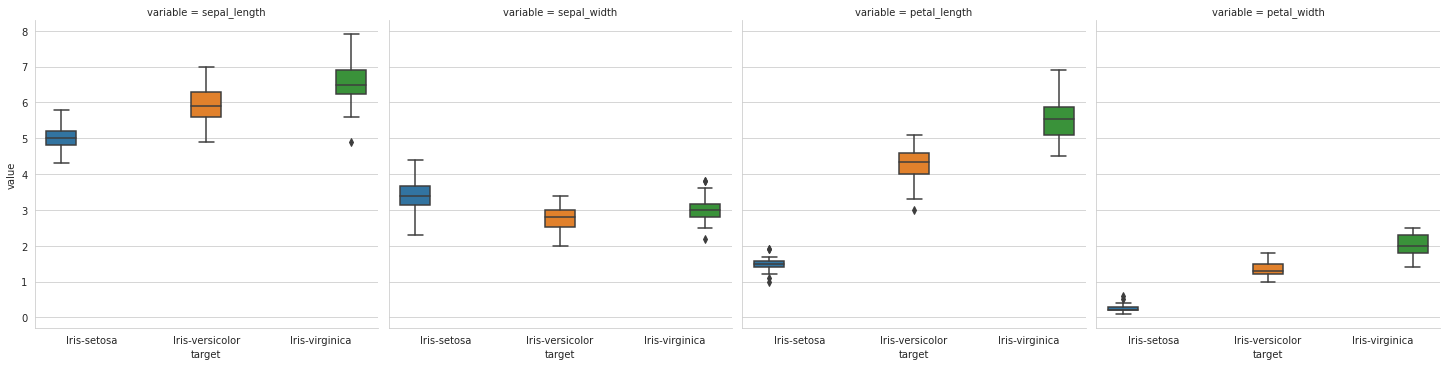

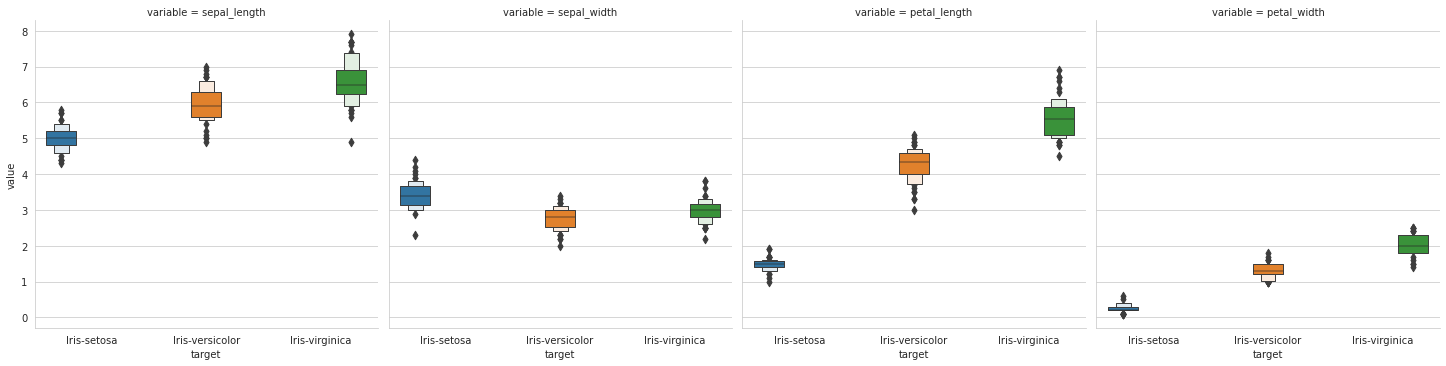

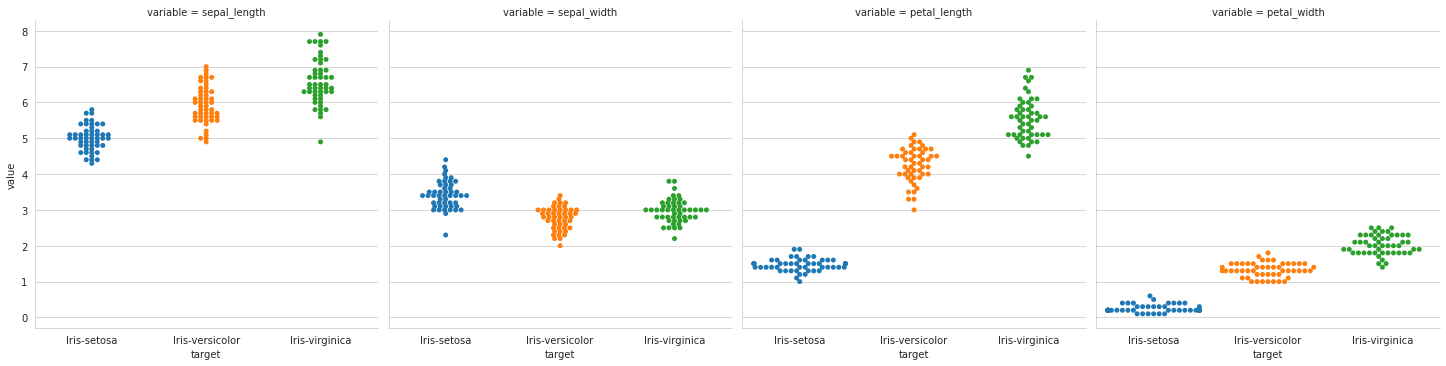

In [ ]:
# Hint: use a `catplot`
sns.catplot(x='target', y='value', hue='target', kind='box',col = 'variable', data = iris_df_long)

# TODO: create two more plots, using a boxenplot and a swarmplot.
sns.catplot(x='target', y='value', hue='target', kind='boxen',col = 'variable', data = iris_df_long)
sns.catplot(x='target', y='value', hue='target', kind='swarm',col = 'variable', data = iris_df_long)
